# Taller T3

<table align='left'>
<tr>
<td><img src='https://bitcoinist.com/wp-content/uploads/2019/12/30-December-1-e1577702026209.jpg' width='850'/> </td>
</tr>
</table>


Imagine que el valor de cierta criptomoneda evoluciona con incrementos diarios independientes de manera que el $i$-ésimo día

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl}
2\cdot Z_{i} & \mbox{ con probabilidad} \ p\\
1/2 \cdot Z_{i} & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

Si definimos $Y_i=\log_2(Z_{i})$, lo anterior es equivalente a escribir

\begin{eqnarray}
Y_{i+1} & = Y_{i} + X_i \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

donde $X_i$ es una v.a. discreta de Rademacher (que toma el valor $1$ con probabilidad $p$ y el valor $-1$ con probabilidad $1-p$).

Suponga que valor actual de la moneda es $Z_0=1$ (de modo que $Y_0=0$).

# Actividades


1.   Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p.

2.   Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

3.   Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$?

4.   Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

5.   Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación.

6.  Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas.

7.  Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida.


# Solución

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

##1) Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p.


Como $Y_0=0$, valor de Y después de n días será $Y_n = S_n - B_n$, donde $S_n$ es el número de subidas de precio y $B_n$ es el número de bajadas de precio. Claramente $B_n = n-S_n$, de modo que $Y_n = 2S_n - n$. Como el valor sube con probabilidad $p$ independiente de lo que haya pasado antes, tenemos que $S_n \sim Bin(n,p)$. Esto implica que el recorrido de $Y_n$ tiene n valores $R_n = \{-n, 2-n, 4-n, \ldots, n\}$. La f.d.p. de $Y_n$ queda dada por

\begin{eqnarray}
f(2k-n) & = \binom{n}{k} p^k (1-p)^{n-k}
\end{eqnarray}

Por lo tanto, el recorrido de $Z$ es $R_n = \{2^{-n}, 2^{2-n}, 2^{4-n}, \ldots, 2^{n}\}$ y su f.d.p. es

\begin{eqnarray}
f(2^{2k-n}) & = \binom{n}{k} p^k (1-p)^{n-k}
\end{eqnarray}

Notar que:

*   Se piden los posibles valores de $Z_n$
*   Se pide la f.d.p. de $Z_n$.
*   **Posible error:** Puede que algunos grupos construyan la f.d.p. para **la cantidad de dias en los que se gana dinero**, y no para **el valor de la moneda**
*   La f.d.p. depende del día *n*
*   Los posibles valores de $Y_n$ "van de 2 en 2", por ejemplo, para $n=10$ se tiene:


$$Y_{10} =\{-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10\}$$



##2) Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?


Se define la función para calcular el valor teórico de $Z_n$

In [ ]:
from scipy.stats import binom

def teo_z(n = 30, p=0.6):
  values_binom = np.array([k for k in range(0,n+1)])
  values_y_teo = np.array([2.0*k-n for k in range(0,n+1)])
  values_z_teo = np.array([2.0**y for y in values_y_teo])
  prob_z_teo = np.array([binom.pmf(z, n, p) for z in values_binom])

  esperado_z_teo = np.sum(np.multiply(prob_z_teo,values_z_teo))
  diff_mean2 = (values_z_teo-esperado_z_teo)**2
  varianza_z_teo = np.sum(np.multiply(prob_z_teo,diff_mean2))
  return values_z_teo, prob_z_teo, esperado_z_teo, varianza_z_teo


Se define la función para calcular el $Z_n$ simulado.

In [ ]:
Z0 = 1
p = 0.6
all_X = []

def simulate(dias=30):
  Y = np.log2(Z0)
  resultados = []
  for n in range(0,dias):
    X = 2.0*float((random.uniform(0, 1) < p)) - 1
    Y = Y + X
    resultados.append(Y)
    all_X.append(X)
  return np.array(resultados)

max_repetitions = 1000000
dias = 30
resultados_Y = np.zeros((max_repetitions,dias))
for r in range(max_repetitions):
  path_Y = simulate(dias)
  resultados_Y[r,:] = path_Y

resultados_Z = 2**(resultados_Y)


Aquí está la f.d.p. para $n=10$ y $p=0,6$

In [ ]:
values_z_teo, prob_z_teo, _, _ = teo_z(n = 10, p =0.6)
values_Z, counts_Z = np.unique(resultados_Z[:,9],return_counts=True)
counts_Z = counts_Z/np.sum(counts_Z)

import pandas as pd
df = pd.DataFrame(values_Z,columns=['z simulado'])
df['f(z) simulado'] = counts_Z
df['z teo'] = values_z_teo
df['f(z) teo'] = prob_z_teo
print(df)

     z simulado  f(z) simulado        z teo  f(z) teo
0      0.000977       0.000091     0.000977  0.000105
1      0.003906       0.001539     0.003906  0.001573
2      0.015625       0.010694     0.015625  0.010617
3      0.062500       0.042224     0.062500  0.042467
4      0.250000       0.111436     0.250000  0.111477
5      1.000000       0.201222     1.000000  0.200658
6      4.000000       0.249441     4.000000  0.250823
7     16.000000       0.216021    16.000000  0.214991
8     64.000000       0.121289    64.000000  0.120932
9    256.000000       0.040091   256.000000  0.040311
10  1024.000000       0.005952  1024.000000  0.006047


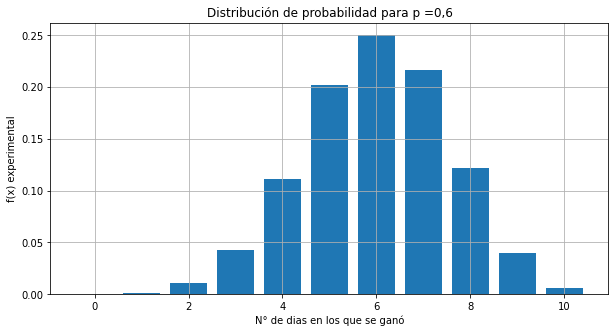

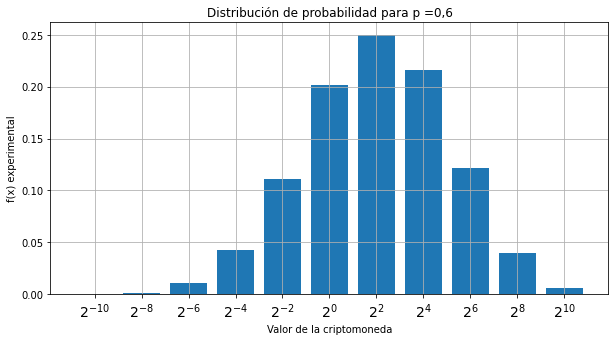

In [ ]:
plt.figure(figsize = (10, 5))
plt.xlabel('N° de dias en los que se ganó')
plt.ylabel('f(x) experimental')
eje_x = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(eje_x, counts_Z )
plt.title("Distribución de probabilidad para p =0,6")
plt.grid()
plt.show()

plt.figure(figsize = (10, 5))
plt.xlabel('Valor de la criptomoneda')
plt.ylabel('f(x) experimental')
eje_x = ["$2^{-10}$","$2^{-8}$","$2^{-6}$","$2^{-4}$","$2^{-2}$","$2^{0}$","$2^{2}$","$2^{4}$","$2^{6}$","$2^{8}$","$2^{10}$"]
plt.xticks(fontsize=14)
plt.bar(eje_x, counts_Z )
plt.title("Distribución de probabilidad para p =0,6")
plt.grid()
plt.show()


**En esta pregunta no se pide un gráfico, pero se presenta para poder ver si la distribución es simétrica.**

*    ¿Cuál es el valor más probable de  $Zn$ ?

    $Z_{10} = 4$ (valor de la criptomoneda), el cual se obtiene luego de ganar 6 días y perder 4.
*   ¿Es simétrica la distribución?
    
    No, ya que la probabilidad de ganar($p=0.6$) es mayor a la de perder, lo que produce un sesgo negativo(hacia la derecha) en la distribución de probabilidad, tal como se muestra en el gráfico anterior.



**Ahora se realiza lo mismo para $p=0,5$**

In [ ]:
#@title
p = 0.5
resultados_Y_05 = np.zeros((max_repetitions,dias))
for r in range(max_repetitions):
  path_Y_05 = simulate(dias)
  resultados_Y_05[r,:] = path_Y_05

resultados_Z_05 = 2**(resultados_Y_05)
values_z_teo_05, prob_z_teo_05, _, _ = teo_z(n = 10, p =0.5)
values_Z_05, counts_Z_05 = np.unique(resultados_Z_05[:,9],return_counts=True)
counts_Z_05 = counts_Z_05/np.sum(counts_Z_05)

df = pd.DataFrame(values_Z_05,columns=['z simulado'])
df['f(z) simulado'] = counts_Z_05
df['z teo'] = values_z_teo_05
df['f(z) teo'] = prob_z_teo_05
print(df)

     z simulado  f(z) simulado        z teo  f(z) teo
0      0.000977       0.001014     0.000977  0.000977
1      0.003906       0.009725     0.003906  0.009766
2      0.015625       0.043775     0.015625  0.043945
3      0.062500       0.117661     0.062500  0.117188
4      0.250000       0.204804     0.250000  0.205078
5      1.000000       0.246446     1.000000  0.246094
6      4.000000       0.205138     4.000000  0.205078
7     16.000000       0.117047    16.000000  0.117188
8     64.000000       0.043811    64.000000  0.043945
9    256.000000       0.009648   256.000000  0.009766
10  1024.000000       0.000931  1024.000000  0.000977


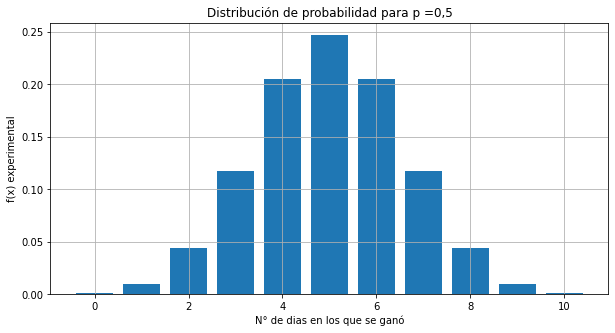

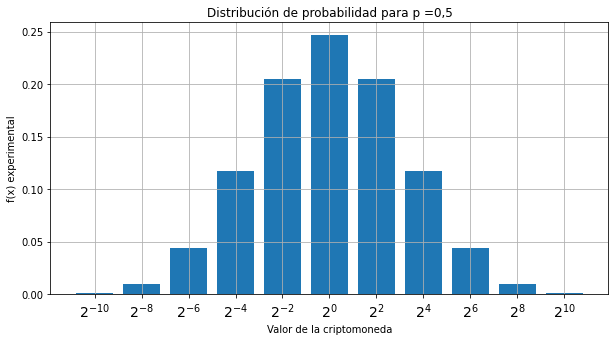

In [ ]:
#@title
plt.figure(figsize = (10, 5))
plt.xlabel('N° de dias en los que se ganó')
plt.ylabel('f(x) experimental')
eje_x = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(eje_x, counts_Z_05 )
plt.title("Distribución de probabilidad para p =0,5")
plt.grid()
plt.show()

plt.figure(figsize = (10, 5))
plt.xlabel('Valor de la criptomoneda')
plt.ylabel('f(x) experimental')
eje_x = ["$2^{-10}$","$2^{-8}$","$2^{-6}$","$2^{-4}$","$2^{-2}$","$2^{0}$","$2^{2}$","$2^{4}$","$2^{6}$","$2^{8}$","$2^{10}$"]
plt.xticks(fontsize=14)
plt.bar(eje_x, counts_Z_05 )
plt.title("Distribución de probabilidad para p =0,5")
plt.grid()
plt.show()

Para $p=0,5$ se tiene:
*    ¿Cuál es el valor más probable de  $Zn$ ?

    $Z_{10} = 1$ (valor de la criptomoneda), el cual se obtiene luego de ganar 5 días y perder 5.
*   ¿Es simétrica la distribución?
    
    Si, ya que la probabilidad de ganar y perder son iguales, y como la f.d.p. es una binomial, se obtiene una distribución simétrica.

##3) Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$?

En esta pregunta se deben obtener los resultados **Teóricos** del valor esperado y varianza para $p=0,6$ y $p=0,5$ durante los primeros 30 días.

### Momentos Teóricos de Z

In [ ]:
#Teóricos de p=0,6
diasss = list(range(31))
esperados_z_teo = []
varianzas_z_teo = []
for d in range(1,dias+1):
  values_z_teo, prob_z_teo, esperado_z_teo, varianza_z_teo = teo_z(d,p=0.6)
  esperados_z_teo.append(esperado_z_teo)
  varianzas_z_teo.append(varianza_z_teo)

#Teóricos de p=0,5
diasss = list(range(31))
esperados_z_teo_05 = []
varianzas_z_teo_05 = []
for d in range(1,dias+1):
  values_z_teo_05, prob_z_teo_05, esperado_z_teo_05, varianza_z_teo_05 = teo_z(d,p=0.5)
  esperados_z_teo_05.append(esperado_z_teo_05)
  varianzas_z_teo_05.append(varianza_z_teo_05)

#El dia 0 la moneda solo puede valer 1
esperados_z_teo.insert(0,1)
esperados_z_teo_05.insert(0,1)
varianzas_z_teo.insert(0,0)
varianzas_z_teo_05.insert(0,0)


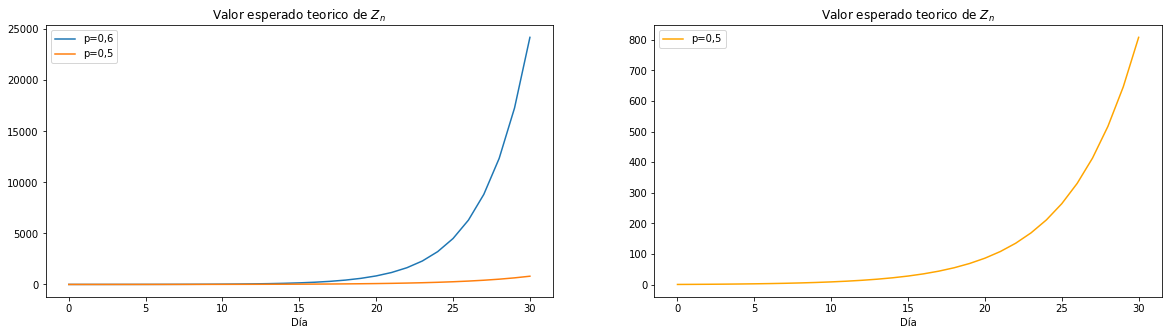

In [ ]:
diasss = list(range(31))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,esperados_z_teo,label='p=0,6')
ax1.plot(diasss,esperados_z_teo_05,label='p=0,5')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Valor esperado teorico de $Z_n$')

ax2.plot(diasss,esperados_z_teo_05,label='p=0,5',color='orange')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Valor esperado teorico de $Z_n$')

plt.show()

In [ ]:
print("valor esperado teorico del dia 30 para p=0,6: "+str(esperados_z_teo[-1]))
print("valor esperado teorico del dia 30 para p=0,5: "+str(esperados_z_teo_05[-1]))

valor esperado teorico del dia 30 para p=0,6: 24201.432355484463
valor esperado teorico del dia 30 para p=0,5: 807.7935669463113


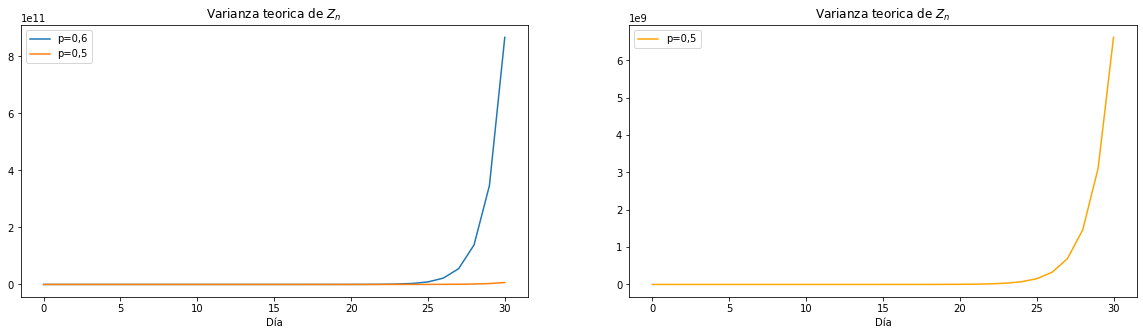

In [ ]:
diasss = list(range(31))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,varianzas_z_teo,label='p=0,6')
ax1.plot(diasss,varianzas_z_teo_05,label='p=0,5')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Varianza teorica de $Z_n$')

ax2.plot(diasss,varianzas_z_teo_05,label='p=0,5',color='orange')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Varianza teorica de $Z_n$')

plt.show()

**Notar que:**

* En el gráfico de la izquierda el eje y está expresado en 1 x 10^11
* En el gráfico de la derecha el eje y está expresado en 1 x 10^9

In [ ]:
print("varianza teorica del dia 30 para p=0,6: "+str(varianzas_z_teo[-1]))
print("varianza teorica del dia 30 para p=0,5: "+str(varianzas_z_teo_05[-1]))

varianza teorica del dia 30 para p=0,6: 866776028660.3435
varianza teorica del dia 30 para p=0,5: 6617976373.861478


**¿Qué se observa?**

Para p=0,6 el valor esperado crece mucho más que para p=0,5. Esto, debido a que la probabilidad de ganar es mayor, produciendo que la moneda tienda a tener un valor mayor(como se obtuvo en la pregunta 2) y, por lo tanto, su valor esperado también sea mayor.

Para p=0,6 la varianza crece mucho más que para p=0,5. Esto, debido a que la distribución de probabilidad no es simétrica, produciendo una mayor dispersión de los valores que pueda tomar la moneda.

### Momentos Teóricos de Y

Ahora se calculan los primeros momentos de $Y_i$, donde para el *i-esimo* día:

Valor esperado:
\begin{align*}
Y_i &= -n+2\cdot k \\
E[Y_i] &= E[-n+2\cdot k] \\
E[Y_i] &= -n + 2\cdot E[k]
\end{align*}

Varianza:

\begin{align*}
Y_i &= -n+2\cdot k \\
Var[Y_i] &= Var[-n+2\cdot k] \\
Var[Y_i] &= 2^2 \cdot Var[k] \\
Var[Y_i] &= 4 \cdot Var[k]
\end{align*}

Como *k* corresponde al número de subidas, y, ademas, sigue una distribución binomial, entonces:

$$E[k]=n\cdot p$$
$$Var[k] = n \cdot p \cdot (1-p)$$

In [ ]:
#Y_i sigue una binomial con n={0,...,30} y p=0,6 o p=0,5
#El valor esperado de una binomial es n*p
#La varianza de una binomial es n*p*(1-p)
from scipy.special import comb
p1 = 0.5
p2 = 0.6
Y_esp = []
Y_var = []
Y_esp_06 = []
Y_var_06 = []

for hoy in range(31):
  bin_esp = -hoy + 2*(hoy*p1)
  bin_var = 4*(hoy*p1*(1-p1))
  Y_esp.append(bin_esp)
  Y_var.append(bin_var)
  #p2=0.6
  bin_esp_06 = -hoy + 2*(hoy*p2)
  bin_var_06 = 4*(hoy*p2*(1-p2))
  Y_esp_06.append(bin_esp_06)
  Y_var_06.append(bin_var_06)


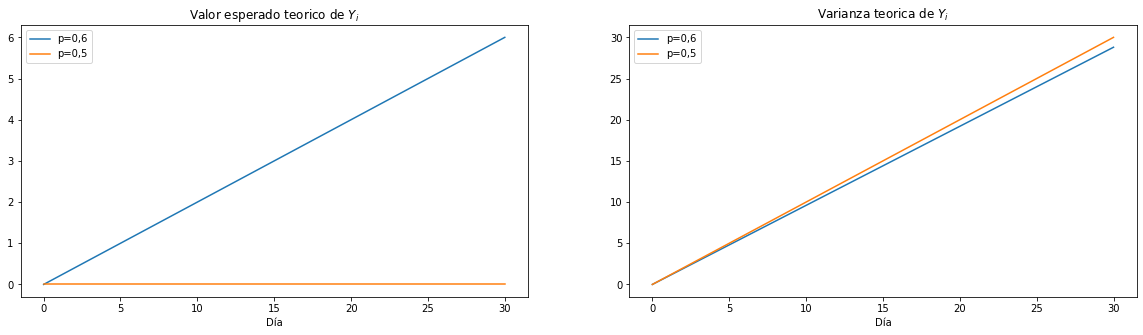

In [ ]:
diasss = list(range(31))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,Y_esp_06,label='p=0,6')
ax1.plot(diasss,Y_esp,label='p=0,5')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Valor esperado teorico de $Y_i$')

ax2.plot(diasss,Y_var_06,label='p=0,6')
ax2.plot(diasss,Y_var,label='p=0,5')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Varianza teorica de $Y_i$')

plt.show()


Se observa que los momentos de $Y$ crecen linealmente. Además, el primer momento aumenta con pendiente $2p-1$, mientras que la varianza aumenta con pendiente $4p(1-p)$.

### Relación entre Momentos de Z e Y

**¿Que relación existe entre estos valores y los primeros momentos de $Y_n$?**

Valor esperado:

* Se observa que para p=0,6 crece de forma lineal.
* Se observa que para p=0,5 se mantiene constante(igual a 0).

Varianza:

* Se observa que para p=0,6 crece de forma lineal.
* Se observa que para p=0,5 crece de forma lineal.


**¿Será que $E[log(Y_i)]=log(E[Y_i])$?**

No, el valor esperado es un operador lineal y logartimo no es una transformación lineal. Sin embargo, como $Z_i = 2**Y_i$ y $f(x)=2^x$ es una función convexa, tenemos que

\begin{align}
E[Z_i]\geq 2^{E[Y_i]}
\end{align}

lo que muestra que si $E[Y_i]>0$, $E[Z_i]$ crece exponencialmente.

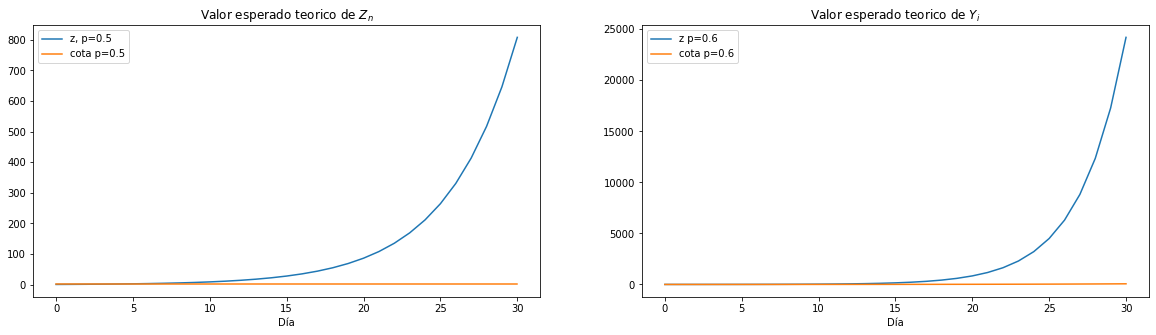

In [ ]:
diasss = list(range(31))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,esperados_z_teo_05,label='z, p=0.5')
ax1.plot(diasss,2**np.array(Y_esp),label='cota p=0.5')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Valor esperado teorico de $Z_n$')

ax2.plot(diasss,esperados_z_teo,label='z p=0.6')
ax2.plot(diasss,2**np.array(Y_esp_06),label='cota p=0.6')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Valor esperado teorico de $Y_i$')

plt.show()

##4) Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?



Se calculan los momentos experimentales a partir de las simulaciones hechas en 2).

In [ ]:
#Experimentales de p=0,6
esperados_z_exp = np.mean(resultados_Z,axis=0)
seg_mom_z_exp = np.mean(resultados_Z**2,axis=0)
varianzas_z_exp = seg_mom_z_exp - esperados_z_exp**2

#Experimentales de p=0,5
esperados_z_05_exp = np.mean(resultados_Z_05,axis=0)
seg_mom_z_05_exp = np.mean(resultados_Z_05**2,axis=0)
varianzas_z_05_exp = seg_mom_z_05_exp - esperados_z_05_exp**2

esperados_z_exp = list(esperados_z_exp)
esperados_z_05_exp = list(esperados_z_05_exp)
varianzas_z_exp = list(varianzas_z_exp)
varianzas_z_05_exp = list(varianzas_z_05_exp)

esperados_z_exp.insert(0,1)
esperados_z_05_exp.insert(0,1)
varianzas_z_exp.insert(0,0)
varianzas_z_05_exp.insert(0,0)

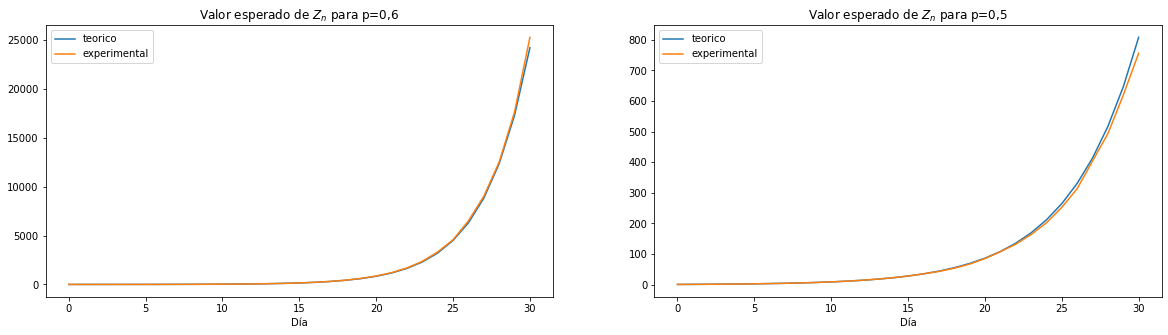

In [ ]:
diasss =[]
for a in range(31):
  diasss.append(a)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,esperados_z_teo,label='teorico')
ax1.plot(diasss,esperados_z_exp,label='experimental')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Valor esperado de $Z_n$ para p=0,6')

ax2.plot(diasss,esperados_z_teo_05,label='teorico')
ax2.plot(diasss,esperados_z_05_exp,label='experimental')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Valor esperado de $Z_n$ para p=0,5')

plt.show()

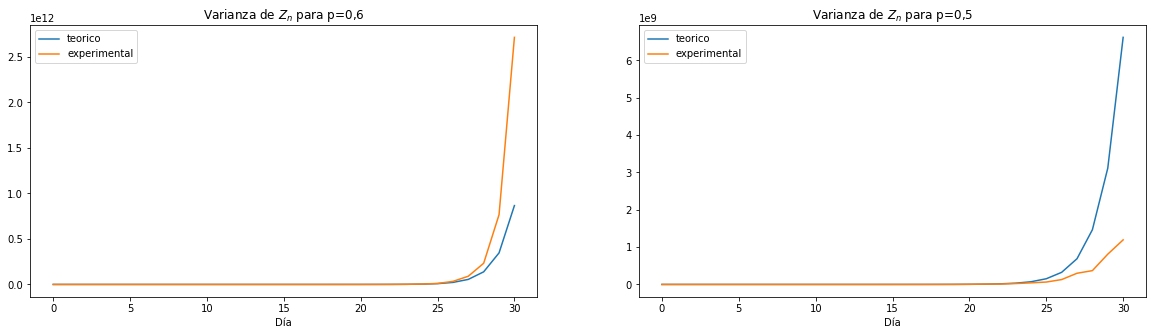

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot(diasss,varianzas_z_teo,label='teorico')
ax1.plot(diasss,varianzas_z_exp,label='experimental')
ax1.legend()
ax1.set_xlabel("Día")
ax1.set_title('Varianza de $Z_n$ para p=0,6')

ax2.plot(diasss,varianzas_z_teo_05,label='teorico')
ax2.plot(diasss,varianzas_z_05_exp,label='experimental')
ax2.legend()
ax2.set_xlabel("Día")
ax2.set_title('Varianza de $Z_n$ para p=0,5')

plt.show()

**¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?**

Los valores simulados se acercan cada vez más a los teóricos a medida que el número de simulaciones aumenta(teorema de los grandes numeros)

##5) Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación.

In [ ]:
# I=1,35^n
I_30 = 1.35**30
print("Impuesto a pagar el dia 30: "+str(I_30))

Impuesto a pagar el dia 30: 8128.549501381563


In [ ]:
valores = {}  # valor moneda al dia 30 :  prob de ese valor
p=0.6
for num in range(31):
  nuevo_valor = (2**(-30+2*num))
  prob = binom.pmf(num,30,p,loc=0)
  valores[nuevo_valor] = prob

valores_con_taxes = {}
for a in valores:
  valores_con_taxes[a-I_30] = valores[a]

prob_ganancia = 0
for val_con_taxes in valores_con_taxes:
  if val_con_taxes >= 0:
    prob_ganancia = prob_ganancia + valores_con_taxes[val_con_taxes]

print("probabilidad de ganar dinero vendiendo la moneda el dia 30: "+str(prob_ganancia))
print("probabilidad de perder dinero vendiendo la moneda el dia 30: "+str(1 - prob_ganancia))


probabilidad de ganar dinero vendiendo la moneda el dia 30: 0.09401121583009432
probabilidad de perder dinero vendiendo la moneda el dia 30: 0.9059887841699057


**Utilidad**

Para el calculo de la utilidad se pueden haber considerado 2 análisis distintos:

1.   Calcular la utilidad a partir todos los valores posibles, incluyendo cuando hay pérdidas al dia 30
2.   Calcular la utilidad a partir de solo los valores positivos, es decir, solo cuando hay ganancia

De estos 2 análisis, el primero es correcto, ya que permite obtener la utilidad esperada cuando se compran muchas monedas (con evolución independiente) y, con esto, se puede tomar la decisión de comprar **muchas** monedas o no.

In [ ]:
utilidad_esp_all = 0 #caso 1
utilidad_esp_positivo = 0 #caso 2

for val in valores_con_taxes:
  utilidad_esp_all = utilidad_esp_all + val*valores_con_taxes[val]
  if val > 0:
    utilidad_esp_positivo = utilidad_esp_positivo + val*valores_con_taxes[val]
print("utilidad esperada(todos los valores): "+str(utilidad_esp_all))
print("utilidad esperada(solo valores positivos): " +str(utilidad_esp_positivo))

utilidad esperada(todos los valores): 16072.882854102954
utilidad esperada(solo valores positivos): 22934.42424241477


**¿Conviene comprar una moneda si se debe vender después del primer mes?**

Al dia 30 se tiene que:

*   Prob. ganar dinero = 9,4%
*   Prob. perder dinero = 90,6%
*   Utilidad esperada = $16.072,88

**Conlusión:**

* Se debe concluir que no conviene comprar **UNA** moneda, pues la probabilidad de perder es mucho mayor que la de ganar.
* También, se puede concluir que si se compran **MUCHAS** monedas, entonces si conviene comprar, pues se obtendrá una utilidad cercana a $16.072,88 , ya que las veces que se gana(9,4%) compensan las pérdidas(90,6%).

Para las simulaciones se deben obtener valores cercanos debido a la ley de los grandes numeros


##6) Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas.




Sea $E_{n}$ el evento en que se verifica una racha de 5 o más alzas consecutivas durante los primeros n días. Queremos calcular $P(E_{14})$. Para calcular $P(E_{n})$ podemos considerar dos casos: (1) se da una racha durante los primeros n-1 días (en cuyo caso da lo mismo lo que suceda el día n) o (2) no se da una racha durante los primeros n-1 días. En este último caso, la única posibilidad de obtener una racha es que el último resultado sea un alza que complete una secuencia de exactamente 4 alzas consecutivas (porque sabemos que no hay una racha en los primeros n-1 días). En otras palabras, los últimos 5 días antes del día n deben ser (en este orden): baja, alza, alza, alza, alza. Por lo tanto,

\begin{eqnarray}
P(E_n) &= P(E_{n-1}) + P(\bar{E}_{n-6}) (1-p)p^5
\end{eqnarray}



Sabemos además que $P(E_k)=0$ para todo $k < 5$ y que $P(E_5)=p^5$. Usando la recursión también sabemos que $P(E_6)=p^5 + (1-p)p^5$.

In [ ]:
n_max = 14
p = 0.5
prob_racha_teo = np.zeros(n_max)
prob_racha_teo[0] = 0 #dia 1
prob_racha_teo[1] = 0 #dia 2
prob_racha_teo[2] = 0 #dia 3
prob_racha_teo[3] = 0 #dia 4
prob_racha_teo[4] = p**5 #dia 5
prob_racha_teo[5] = (p**5) + (1-p)*(p**5) #dia 6
prob_racha_teo[6] = (p**5) + (1-p)*(p**5) + (1-p)*(1-p)*(p**5) #dia 7
prob_racha_teo[7] = (p**5) + (1-p)*(p**5) + (1-p)*(1-p)*(p**5) + ((1-p)**3)*(p**5) #dia 8
prob_racha_teo[8] = (p**5) + (1-p)*(p**5) + ((1-p)**2)*(p**5) + ((1-p)**3)*(p**5) + ((1-p)**4)*(p**5) #dia 9
prob_racha_teo[9] = (p**5) + (1-p)*(p**5) + ((1-p)**2)*(p**5) + ((1-p)**3)*(p**5) + ((1-p)**4)*(p**5) + ((1-p)**5)*(p**5) #dia 10

for j in range(6,n_max):
  prob_racha_teo[j] = prob_racha_teo[j-1] + (1-p)*(p**5)*(1-prob_racha_teo[j-6])
  print(j)

print("Prob. Teo: ", prob_racha_teo[-1])
print(prob_racha_teo)


6
7
8
9
10
11
12
13
Prob. Teo:  0.16845703125
[0.         0.         0.         0.         0.03125    0.046875
 0.0625     0.078125   0.09375    0.109375   0.12451172 0.1394043
 0.15405273 0.16845703]


In [ ]:
dias = 14
simulaciones = 10**6
p = 0.5

total_racha = 0
for a in range(simulaciones):
  seguidos = 0
  for b in range(dias):
    if np.random.uniform(0,1) <= p: #Se gana
      seguidos += 1
      if seguidos == 5: #Ya se cumplio la racha, no es necesario seguir iterando
        total_racha += 1
        break
    else:
      seguidos = 0

print("Probabilidad Empírica: "+str(total_racha/simulaciones))



Probabilidad Empírica: 0.16878


##7) Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida.



Sea $D$ el número de días que pasan hasta que se observan por primera vez las 5 alzas consecutivas. Tenemos que $P(D=5)=p^5$, $P(D=6)=(1-p)p^5$. Si $D=n$ entonces, los últimos 6 días deben corresponder a un patrón de la forma baja, alza, alza, alza, alza, alza y además debe ocurrir que $D>n-6$ de modo que sigamos en el mercado el día $n$.
\begin{eqnarray}
P(D=n) &= (1-p)p^5 P(D > n-6)
\end{eqnarray}


In [ ]:
n_max = 300
p = 0.5
prob_n = np.zeros(n_max+1)
prob_acum_n = np.zeros(n_max+1)
prob_n[0] = 0 #1 dia
prob_n[1] = 0 #2 dias
prob_n[2] = 0 #3 dias
prob_n[3] = 0 #4 dias
prob_n[4] = p**5 #5 dias
prob_n[5] = (1-p)*(p**5) #6 dias
prob_acum_n[0] = 0 #1 dia
prob_acum_n[1] = 0 #2 dias
prob_acum_n[2] = 0 #3 dias
prob_acum_n[3] = 0 #4 dias
prob_acum_n[4] = p**5 #5 dias
prob_acum_n[5] = p**5 + (1-p)*(p**5) #6 dias

for j in range(6,n_max+1):
  prob_n[j] = (1-p)*(p**5)*(1-prob_acum_n[j-1])
  prob_acum_n[j] = prob_acum_n[j-1] + prob_n[j]


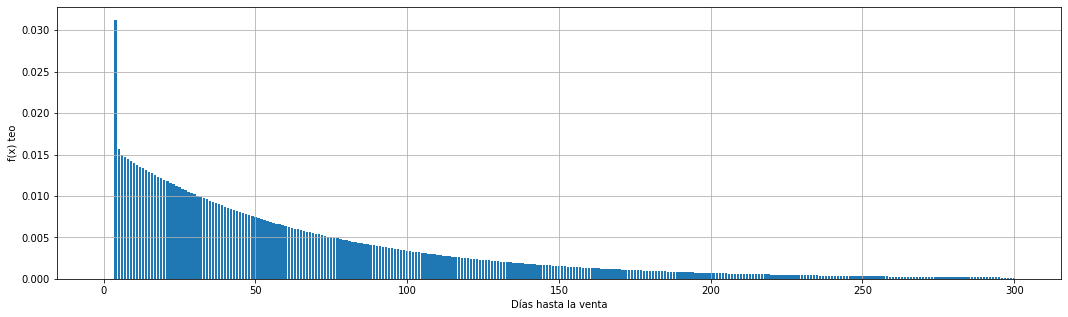

In [ ]:
eje_x = [int(d) for d in range(0,n_max+1)]
eje_y = prob_n
plt.figure(figsize = (18, 5))
plt.xlabel('Días hasta la venta')
plt.ylabel('f(x) teo')
plt.bar(eje_x, eje_y)
plt.grid()
plt.show()

A continuación hacemos la verificación experimental.

In [ ]:
resultados = {}
p = 0.5
simulaciones = 10**5

valor=1
lista_valores
for a in range(simulaciones):
    dia = 0
    seguidos = 0
    while True:
        dia += 1
        if np.random.uniform(0,1) <= p:
            seguidos += 1
            if seguidos ==5:
                break
        else:
            seguidos = 0
    if dia in resultados:
        resultados[dia] += 1
    else:
        resultados[dia] = 1

ordenado = sorted(resultados.items())
eje_x = []
eje_y = []
for a in ordenado:
    eje_x.append(a[0])
    eje_y.append(a[1]/simulaciones)


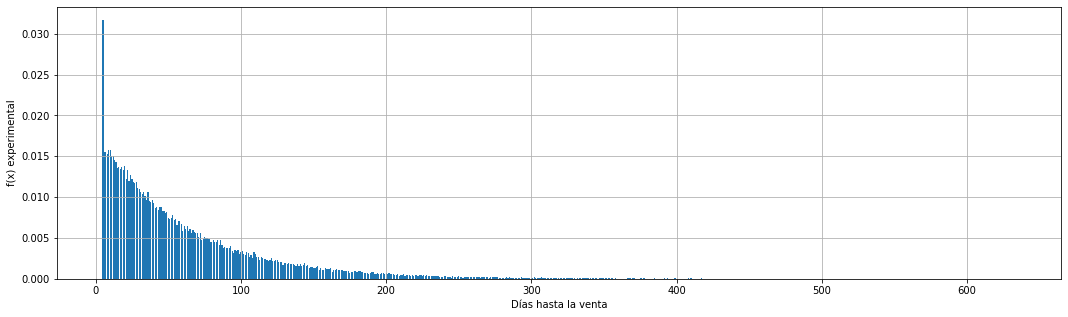

In [ ]:
plt.figure(figsize = (18, 5))
plt.xlabel('Días hasta la venta')
plt.ylabel('f(x) experimental')
plt.bar(eje_x, eje_y)
plt.grid()
plt.show()